In [67]:
import os
os.makedirs("../plots", exist_ok=True)

📊 01 - Visualize Synthetic Energy & Carbon Data

In [68]:
import sys
from pathlib import Path

# Add the src/ folder to sys.path
project_src = Path.cwd().parents[0] / "src"
if str(project_src) not in sys.path:
    sys.path.insert(0, str(project_src))

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Use clean style for plots
sns.set(style='whitegrid')

In [ ]:
from utils.loader import load_synthetic_dataset

res = load_synthetic_dataset("synthetic_energy_residential_365d.csv")
com = load_synthetic_dataset("synthetic_energy_commercial_365d.csv")
mix = load_synthetic_dataset("synthetic_energy_mixed_365d.csv")

In [72]:
# === Prepare Daily Averages ===
def prepare_df(df, label):
    df = df.copy()
    df['date'] = df['timestamp'].dt.date
    daily = df.groupby('date')[['energy_kWh', 'carbon_kgCO2e']].mean()
    daily['sector'] = label
    return daily

res_d = prepare_df(res, 'Residential')
com_d = prepare_df(com, 'Commercial')
mix_d = prepare_df(mix, 'Mixed')

combined = pd.concat([res_d, com_d, mix_d]).reset_index()

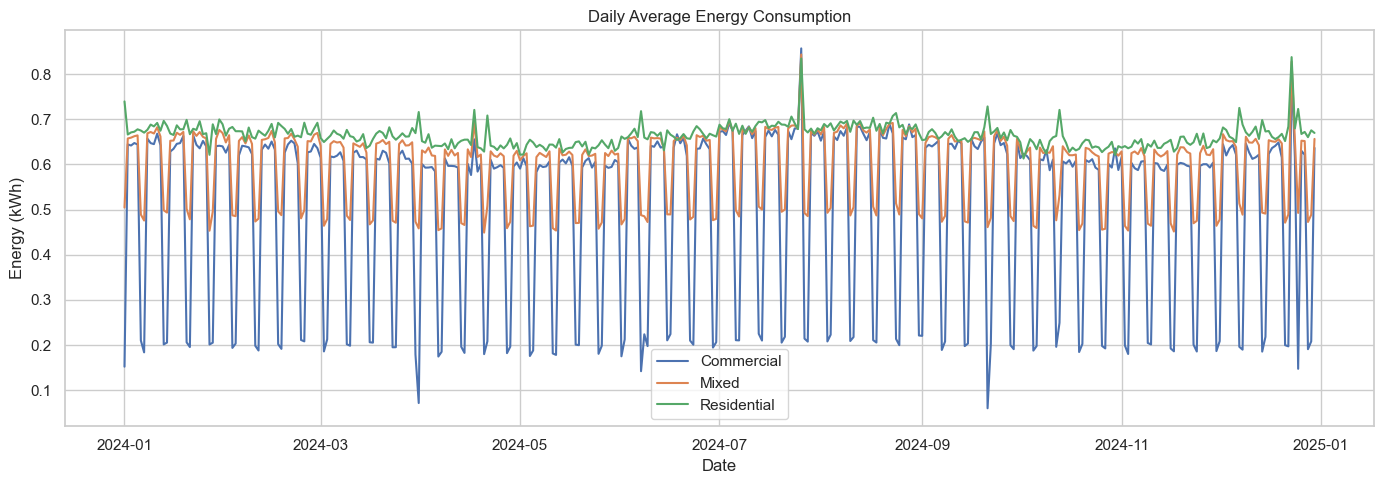

In [73]:
# === Plot Daily Energy Consumption ===
plt.figure(figsize=(14, 5))
for label, group in combined.groupby('sector'):
    plt.plot(group['date'], group['energy_kWh'], label=label)
plt.title('Daily Average Energy Consumption')
plt.ylabel('Energy (kWh)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

plt.savefig("../plots/energy_by_sector.png", dpi=300)  # ✅ Save BEFORE show
plt.show()


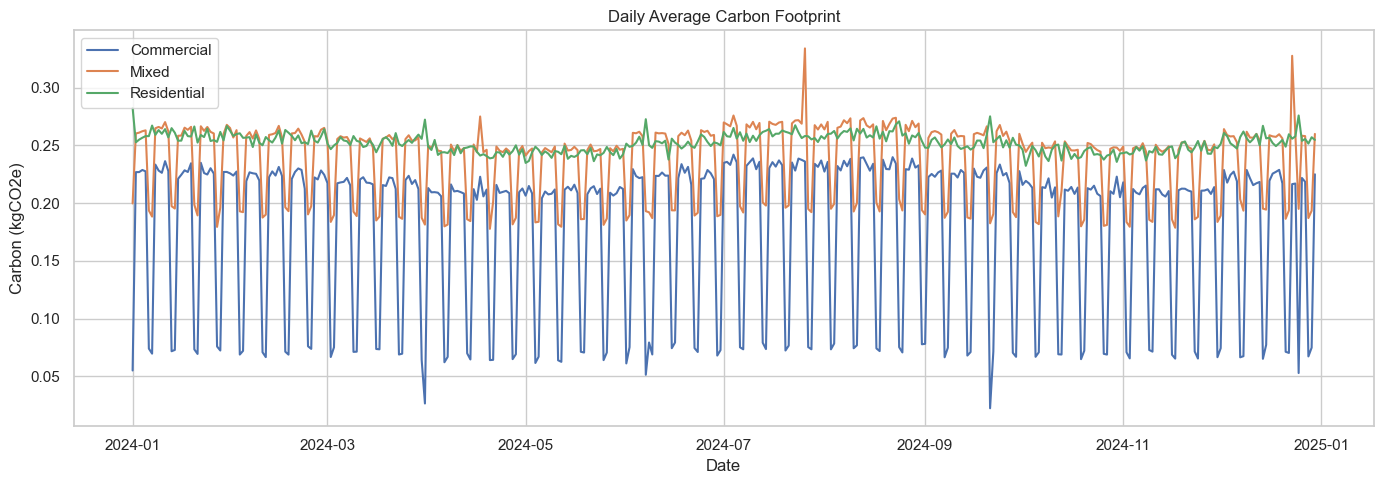

In [74]:
# === Plot Daily Carbon Footprint ===
plt.figure(figsize=(14, 5))
for label, group in combined.groupby('sector'):
    plt.plot(group['date'], group['carbon_kgCO2e'], label=label)
plt.title('Daily Average Carbon Footprint')
plt.ylabel('Carbon (kgCO2e)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

plt.savefig("../plots/carbon_by_sector.png", dpi=300)  # ✅ Save before show
plt.show()

In [75]:
# Add 7-day rolling averages
combined['energy_kWh_smooth'] = combined.groupby('sector')['energy_kWh'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
combined['carbon_kgCO2e_smooth'] = combined.groupby('sector')['carbon_kgCO2e'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())


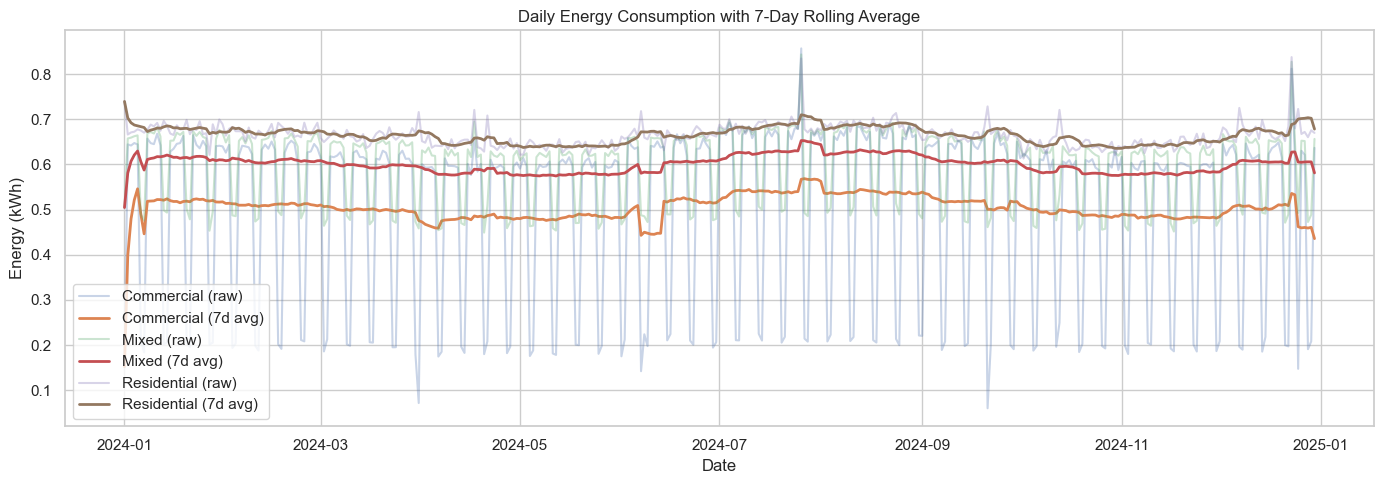

In [76]:
plt.figure(figsize=(14, 5))
for label, group in combined.groupby('sector'):
    plt.plot(group['date'], group['energy_kWh'], alpha=0.3, label=f"{label} (raw)")
    plt.plot(group['date'], group['energy_kWh_smooth'], linewidth=2, label=f"{label} (7d avg)")
plt.title('Daily Energy Consumption with 7-Day Rolling Average')
plt.ylabel('Energy (kWh)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()



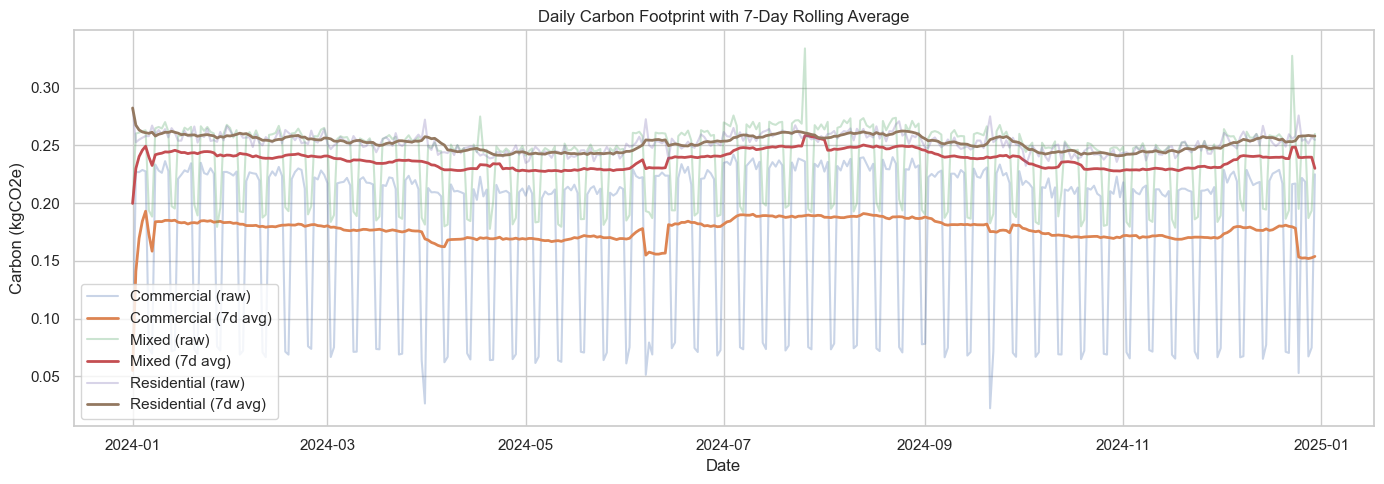

In [77]:
plt.figure(figsize=(14, 5))
for label, group in combined.groupby('sector'):
    plt.plot(group['date'], group['carbon_kgCO2e'], alpha=0.3, label=f"{label} (raw)")
    plt.plot(group['date'], group['carbon_kgCO2e_smooth'], linewidth=2, label=f"{label} (7d avg)")
plt.title('Daily Carbon Footprint with 7-Day Rolling Average')
plt.ylabel('Carbon (kgCO2e)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()
